  route_number  start_point end_point  \
0          A10  Ap Lei Chau   Airport   
1          A11  North Point   Airport   
2          A12   Sai Wan Ho   Airport   
3          A21     Hung Hom   Airport   
4          A22      Lam Tin   Airport   

                                               stops  
0  [Ap Lei Chau Estate, Aberdeen, Wong Chuk Hang,...  
1  [North Point Ferry Pier, Causeway Bay, Wan Cha...  
2  [Sai Wan Ho Ferry Pier, Shau Kei Wan, North Po...  
3  [Hung Hom Station, Tsim Sha Tsui, Jordan, Mong...  
4  [Lam Tin Station, Kwun Tong, Ngau Tau Kok, Kow...  
Average number of stops per route: 7.60
Distribution of route lengths:
num_stops
7    2
8    3
Name: count, dtype: int64


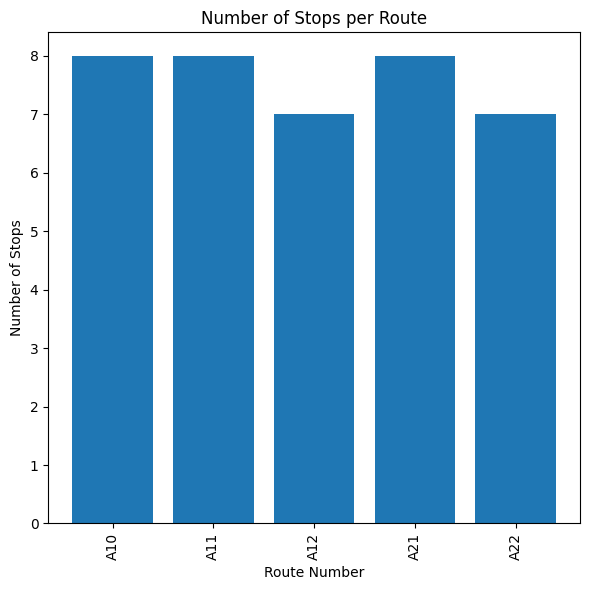

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# As the link does not work, I use the data you give directly instead

### Data Retrieval
data = [
{"route_number": "A10",
"start_point": "Ap Lei Chau",
"end_point": "Airport",
"stops": [
"Ap Lei Chau Estate",
"Aberdeen",
"Wong Chuk Hang",
"Wan Chai",
"Central",
"Western Harbour Crossing",
"Tsing Yi",
"Airport"]},
{
"route_number": "A11",
"start_point": "North Point",
"end_point": "Airport",
"stops": [
"North Point Ferry Pier",
"Causeway Bay",
"Wan Chai",
"Admiralty",
"Central",
"Western Harbour Crossing",
"Tsing Yi",
"Airport"]},
{
"route_number": "A12",
"start_point": "Sai Wan Ho",
"end_point": "Airport",
"stops": [
"Sai Wan Ho Ferry Pier",
"Shau Kei Wan",
"North Point",
"Central",
"Western Harbour Crossing",
"Tsing Yi",
"Airport"]},
{
"route_number": "A21",
"start_point": "Hung Hom",
"end_point": "Airport",
"stops": [
"Hung Hom Station",
"Tsim Sha Tsui",
"Jordan",
"Mong Kok",
"Prince Edward",
"Lai Chi Kok",
"Tsing Yi",
"Airport"]},
{
"route_number": "A22",
"start_point": "Lam Tin",
"end_point": "Airport",
"stops": [
"Lam Tin Station",
"Kwun Tong",
"Ngau Tau Kok",
"Kowloon Bay",
"Kai Tak",
"Tsing Yi",
"Airport"]}]

coordinates = {
"Ap Lei Chau Estate": [22.2484, 114.1535],
"Aberdeen": [22.2479, 114.1511],
"Wong Chuk Hang": [22.2480, 114.1605],
"Wan Chai": [22.2762, 114.1757],
"Central": [22.2829, 114.1588],
"Western Harbour Crossing": [22.2884, 114.1558],
"Tsing Yi": [22.3535, 114.1054],
"Airport": [22.3080, 113.9185],
"North Point": [22.2922, 114.1989],
"North Point Ferry Pier": [22.2922, 114.1989],
"Causeway Bay": [22.2797, 114.1833],
"Admiralty": [22.2783, 114.1655],
"Sai Wan Ho Ferry Pier": [22.2867, 114.2155],
"Shau Kei Wan": [22.2797, 114.2261],
"Hung Hom Station": [22.3030, 114.1858],
"Tsim Sha Tsui": [22.2973, 114.1722],
"Jordan": [22.3042, 114.1717],
"Mong Kok": [22.3193, 114.1706],
"Prince Edward": [22.3244, 114.1688],
"Lai Chi Kok": [22.3374, 114.1476],
"Lam Tin Station": [22.3070, 114.2345],
"Kwun Tong":[22.3138,114.2219],
"Ngau Tau Kok":[22.3152,114.2141],
"Kowloon Bay":[22.3237,114.2031],
"Kai Tak":[22.3240,114.2010]}

### Data Processing
df = pd.DataFrame(data)
print(df)

### Data Analysis and Visualization

df['num_stops'] = df['stops'].apply(len)
average_num_stops = np.mean(df['num_stops'])

route_lengths = df['num_stops'].value_counts().sort_index()

print("Average number of stops per route: {:.2f}".format(average_num_stops))
print("Distribution of route lengths:")
print(route_lengths)

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(df['route_number'], df['num_stops'])
plt.xlabel('Route Number')
plt.ylabel('Number of Stops')
plt.title('Number of Stops per Route')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


import folium

map_hk = folium.Map(location=[22.3193, 114.1694], zoom_start=11)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for idx, row in df.iterrows():
    stops = row['stops']
    
    polyline = folium.PolyLine(locations=[coordinates[stop] for stop in stops], weight=6,color=colors[idx])
    polyline.add_child(folium.Popup(row['route_number']))
    map_hk.add_child(polyline)
    
    for stop in stops:
        marker = folium.Marker(location=coordinates[stop],icon=folium.Icon(color=colors[idx]))
        marker.add_child(folium.Popup(stop))
        map_hk.add_child(marker)

map_hk
map_hk.save('map.html')

# open the map.html file saved on your computer
# click the lines to show route
# click the icons to see stop name
